### Importing required Classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import skew, norm

### Importing the Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


##### Since the Id column is redundant  we can remove that column

In [5]:
train.drop('Id', axis=1, inplace =True)
test.drop('Id', axis=1, inplace=True)

### Data PreProcessing

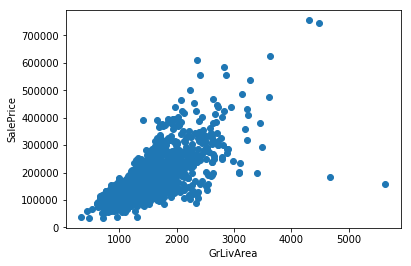

In [6]:
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Dropping the potential Outliers
##### As we observe the above we can understand that the point which depict the GrLivArea as 4000 to 5000 bu the Sale Price is leass than 300K thay might be the potential outliers

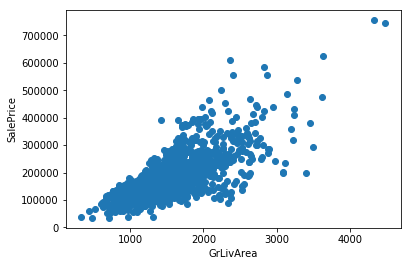

In [7]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

Text(0.5,1,'Sale Price ditribution')

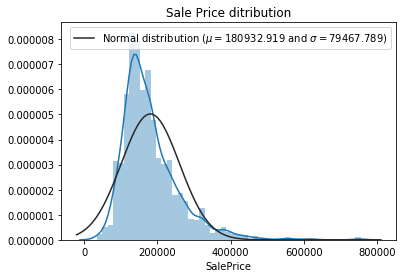

In [8]:
import seaborn as sns
sns.distplot(train['SalePrice'], fit=norm)
(mu,sigma) = norm.fit(train["SalePrice"])

plt.legend(['Normal distribution ($\mu=${:.3f} and $\sigma=${:.3f})'.format(mu,sigma)], loc='best')
plt.title('Sale Price ditribution')

#### As we observe in the above normal distribution plot it is an skewed distribution

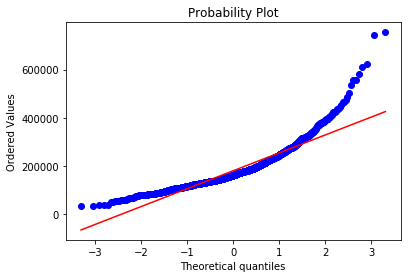

In [9]:
qplot = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Applying the Log Normal Distribution

['$\\mu=$12.024 and $\\sigma=$0.400']


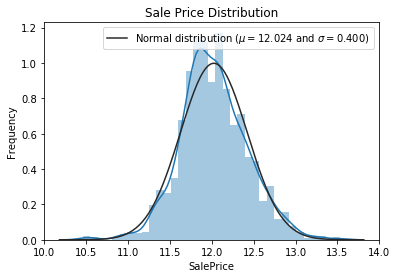

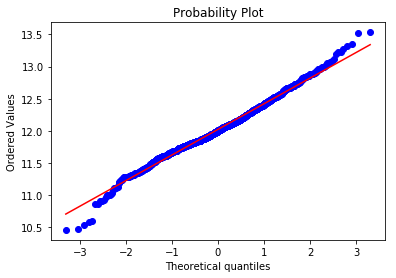

In [10]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma) = norm.fit(train["SalePrice"])

print(['$\mu=${:.3f} and $\sigma=${:.3f}'.format(mu,sigma)])


plt.legend(['Normal distribution ($\mu=${:.3f} and $\sigma=${:.3f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
fig = plt.figure()
qlog = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
#### Concatenating the train and test data for the preprocessing

In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

dff = pd.concat((train,test)).reset_index(drop=True)
dff.drop(['SalePrice'], axis=1, inplace=True)
print('Data Size is: {}'.format(dff.shape))

Data Size is: (2917, 79)


#### Dealing with the Missing Data

In [13]:
dff_na = (dff.isnull().sum()/len(dff))
dff_na = dff_na.drop(dff_na[dff_na == 0].index).sort_values(ascending = False)
missing_values = pd.DataFrame({'Missing Ratio': dff_na})
missing_values.head(50)

,Missing Ratio
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
FireplaceQu,0.486802
LotFrontage,0.166610
GarageQual,0.054508
GarageCond,0.054508
GarageFinish,0.054508
GarageYrBlt,0.054508


Text(0.5,1,'Mising Ratio by each feature')

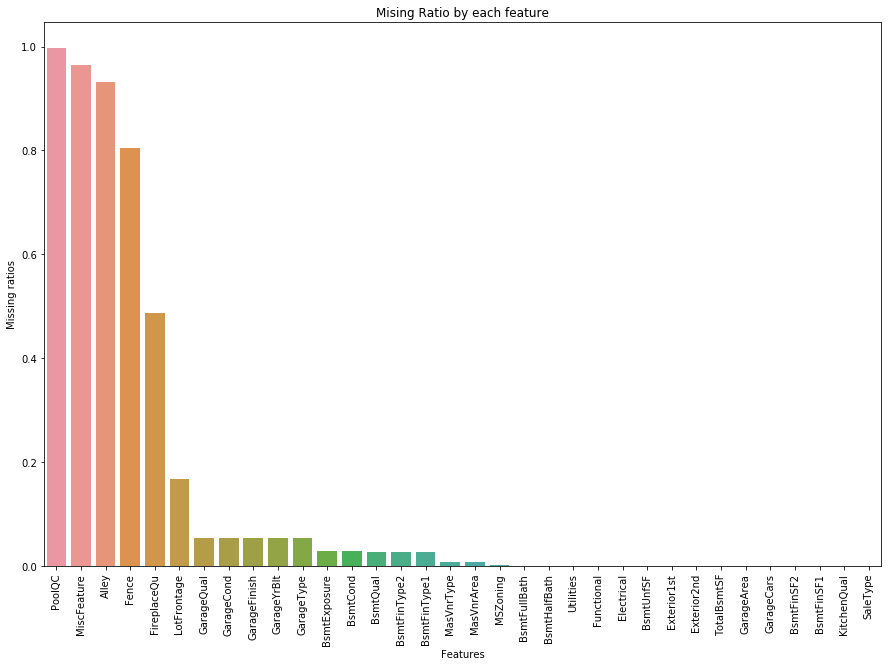

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = dff_na.index, y=dff_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Missing ratios')
plt.title('Mising Ratio by each feature')

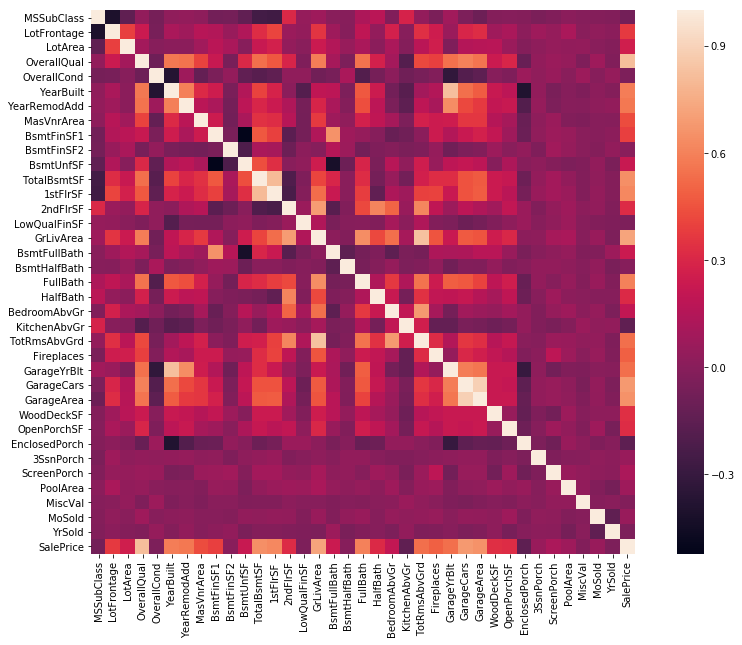

In [15]:
corr = train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, square=True)

In [16]:
dff['PoolQC'] = dff['PoolQC'].fillna('None')

In [17]:
dff['MiscFeature'] = dff['MiscFeature'].fillna('None')

In [18]:
for i in ('Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dff[i] =dff[i].fillna('None')

In [19]:
dff['LotFrontage'] = dff.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [20]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dff[i] =dff[i].fillna(0)

#### Basement Related features

In [21]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dff[i] =dff[i].fillna('0')

In [22]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dff[i] = dff[i].fillna('None')

In [23]:
dff['MasVnrType'] = dff['MasVnrType'].fillna('None')

In [24]:
dff['MasVnrArea'] = dff['MasVnrArea'].fillna(0)

In [25]:
dff['MSZoning'] = dff['MSZoning'].fillna(dff['MSZoning'].mode()[0])

In [26]:
dff = dff.drop(['Utilities'], axis=1)

In [27]:
dff['Functional'] = dff['Functional'].fillna('Typ')

In [28]:
dff['KitchenQual'] = dff['KitchenQual'].fillna(dff['KitchenQual'].mode()[0])

In [29]:
dff['Electrical'] = dff['Electrical'].fillna(dff['Electrical'].mode()[0])

In [30]:
dff['Exterior1st'] = dff['Exterior1st'].fillna(dff['Exterior1st'].mode()[0])
dff['Exterior2nd'] = dff['Exterior2nd'].fillna(dff['Exterior2nd'].mode()[0])

In [31]:
dff['SaleType'] = dff['SaleType'].fillna(dff['SaleType'].mode()[0])

In [32]:
dff['MSSubClass'] = dff['MSSubClass'].fillna('None')

In [33]:
dff_na = (dff.isnull().sum()/len(dff))
dff_na = dff_na.drop(dff_na[dff_na == 0].index).sort_values(ascending = False)
missing_values = pd.DataFrame({'Missing Ratio': dff_na})
missing_values.head(50)

,Missing Ratio


#### Transforming

In [34]:
dff['MSSubClass'] = dff['MSSubClass'].apply(str)
dff['OverallCond'] = dff['OverallCond'].astype(str)
dff['YrSold'] = dff['YrSold'].astype(str)
dff['MoSold'] = dff['MoSold'].astype(str)

In [35]:
from sklearn.preprocessing import LabelEncoder
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC', 'PoolQC', 
           'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in columns:
    labels = LabelEncoder()
    labels.fit(dff[i].values)
    dff[i] = labels.transform(list(dff[i].values))

print('Shape of the data: {}'.format(dff.shape))

Shape of the data: (2917, 78)


In [36]:
dff['TotalSF'] = dff['1stFlrSF'] + dff['2ndFlrSF']

In [37]:
nums = dff.dtypes[dff.dtypes != 'object'].index

skewed_features = dff[nums].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_features})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
EnclosedPorch,4.002344
ScreenPorch,3.945101
MasVnrArea,2.621719


In [38]:
skewness = skewness[abs(skewness) > 0.8]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.2
for i in skewed_features:
    dff[i] = boxcox1p(dff[i], lam)

There are 53 skewed numerical features to Box Cox transform


In [39]:
dff = pd.get_dummies(dff)
print(dff.shape)

(2917, 3679)


In [40]:
train = dff[:ntrain]
test = dff[ntrain:]

#### Modelling

In [41]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

##### Defining Function to Calculate the Root Mean Square

In [42]:
n_folds = 3
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle =True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = 'neg_mean_squared_error', cv=kf))
    return(rmse)

In [43]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.00025, random_state =1))

In [44]:
ElasticNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00025, l1_ratio = 0.9, random_state =3))

In [45]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [46]:
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)

In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [48]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [49]:
score = rmsle_cv(lasso)
print('Lasso Score: {:.3f}({:.3f})'.format(score.mean(), score.std()))

Lasso Score: 0.116(0.007)


In [50]:
score = rmsle_cv(ElasticNet)
print('\n Elastic Net Score: {:.3f} ({:.3f})'.format(score.mean(), score.std()))


 Elastic Net Score: 0.116 (0.006)


In [51]:
score = rmsle_cv(KRR)
print('\n Kernel Ridge Score: {:.3f} ({:.3f})'.format(score.mean(), score.std()))


 Kernel Ridge Score: 0.148 (0.008)


In [52]:
score = rmsle_cv(gboost)
print('\n Gradient Boost Score: {:.3f} ({:.3f})'.format(score.mean(), score.std()))


 Gradient Boost Score: 0.126 (0.007)


In [53]:
score = rmsle_cv(model_xgb)
print('\n XBG Score: {:.3f} ({:.3f})'.format(score.mean(), score.std()))


 XBG Score: 0.122 (0.006)


In [54]:
score = rmsle_cv(model_lgb)
print('\n LGB Score: {:.3f} ({:.3f})'.format(score.mean(), score.std()))


 LGB Score: 0.122 (0.007)


#### Devoleping the Cloning of the models

In [55]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [56]:
average = AveragingModels(models = (ElasticNet, gboost, KRR, lasso))
score = rmsle_cv(average)
print('\n Average scores: {:.3f} ({:.3f}) \n'.format(score.mean(), score.std()))


 Average scores: 0.117 (0.008) 



#### Stacking the models

In [57]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [58]:
stackaverage = StackingAveragedModels(base_models = (ElasticNet, gboost, KRR),
                                      meta_model= lasso)
score = rmsle_cv(stackaverage)
print('\n Average scores: {:.3f} ({:.3f}) \n'.format(score.mean(), score.std()))


 Average scores: 0.113 (0.007) 



### Final predictions

In [59]:
def rms(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [60]:
stackaverage.fit(train.values, y_train)
stack_train_pred = stackaverage.predict(train.values)
stack_pred = np.exp(stackaverage.predict(test.values))
print(rms(y_train, stack_train_pred))

0.07866193641154863


In [61]:
model_xgb.fit(train, y_train)
xgb_pred = model_xgb.predict(train)
xgb = np.exp(model_xgb.predict(test))
print(rms(y_train, xgb_pred))

0.08263143702785185


In [62]:
model_lgb.fit(train, y_train)
lgb_pred = model_lgb.predict(train)
lgb = np.exp(model_lgb.predict(test.values))
print(rms(y_train, lgb_pred))

0.07503507917973944


In [63]:
print('Root Mean Square on train Data')
print(rms(y_train, stack_train_pred*0.8+xgb_pred*0.05+lgb_pred*0.15))

Root Mean Square on train Data
0.0767721936484848


In [64]:
lgb.shape

(1459,)

In [65]:
ensemble = stack_pred*0.80 + xgb*0.05 + lgb*0.15

In [66]:
submission = pd.DataFrame()
submission['SalePrice'] = ensemble
submission.to_csv('submission.csv',index=False)